In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight')

In [153]:
# Function to create Two dataframes. One with countries as Index and the other with Years as Index
def read_dataset(name, indicator):
    df_c = pd.read_excel(name)[2:].reset_index(drop=True)
    df_c.columns = df_c.iloc[0]
    df_c = df_c[1:]
    df_c = df_c[df_c["Indicator Name"] == indicator].reset_index(drop=True)
    for i in range(1960,2000):
        df_c.drop(columns=i, inplace=True)
    df_c.drop(columns=[2021.0], inplace=True) # Dataset by Country


    df_t = df_c.T
    df_t.columns = df_t.iloc[0]
    df_t = df_t[4:]
    df_t.columns.names = [""]
    df_t.index.names = ["Year"] # Dataset by Years

    return df_c, df_t

In [154]:
# Running the Function and setting the Indicator to be used. There were a lot of Indicators.
df_c, df_t = read_dataset("API_19_DS2_en_excel_v2_4752883.xls", "CO2 emissions (kt)")

## **Dataset by Countries**

In [162]:
df_c.sample(5)

,Country Name,Country Code,Indicator Name,Indicator Code,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,...,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
61,East Asia & Pacific (excluding high income),EAP,CO2 emissions (kt),EN.ATM.CO2E.KT,4.137376e+06,4.361588e+06,4.672684e+06,5.333394e+06,6.100326e+06,6.832228e+06,...,1.051073e+07,1.080582e+07,1.125458e+07,1.135369e+07,1.127058e+07,1.130884e+07,1.161361e+07,1.215622e+07,1.249182e+07,NaN
162,Montenegro,MNE,CO2 emissions (kt),EN.ATM.CO2E.KT,1.520000e+03,1.670000e+03,1.770000e+03,1.890000e+03,2.040000e+03,2.000000e+03,...,2.540000e+03,2.330000e+03,2.270000e+03,2.220000e+03,2.360000e+03,2.150000e+03,2.270000e+03,2.500000e+03,2.600000e+03,NaN
31,Brunei Darussalam,BRN,CO2 emissions (kt),EN.ATM.CO2E.KT,4.720000e+03,4.710000e+03,4.620000e+03,5.520000e+03,5.100000e+03,4.990000e+03,...,7.330000e+03,7.300000e+03,7.210000e+03,7.080000e+03,6.400000e+03,6.970000e+03,7.290000e+03,7.540000e+03,6.990000e+03,NaN
16,Burundi,BDI,CO2 emissions (kt),EN.ATM.CO2E.KT,2.600000e+02,2.000000e+02,2.100000e+02,1.600000e+02,1.500000e+02,1.500000e+02,...,3.600000e+02,3.700000e+02,3.900000e+02,3.800000e+02,4.000000e+02,4.400000e+02,5.300000e+02,6.900000e+02,7.200000e+02,NaN
209,Solomon Islands,SLB,CO2 emissions (kt),EN.ATM.CO2E.KT,2.400000e+02,2.500000e+02,2.600000e+02,2.700000e+02,3.100000e+02,3.400000e+02,...,3.500000e+02,3.500000e+02,3.900000e+02,3.400000e+02,3.100000e+02,3.600000e+02,3.500000e+02,3.600000e+02,3.600000e+02,NaN


In [163]:
# Selecting the Top 15 Countries that are already well known for high CO2 Emissions. Keeping them same as GDP for later use in Correlation
top_15_countries = ["United States","China","Japan","Germany","United Kingdom","India","France","Italy","Canada","South Korea",
                    "Russia","Brazil","Australia","Spain","Indonesia", "Russian Federation", "Korea, Rep."]
                    
df_c[df_c["Country Name"].isin(top_15_countries)][["Country Name", 2019.0]]

,Country Name,2019.0
13,Australia,3.865300e+05
29,Brazil,4.343000e+05
35,Canada,5.802100e+05
40,China,1.070722e+07
55,Germany,6.574000e+05
70,Spain,2.399800e+05
77,France,3.005200e+05
81,United Kingdom,3.489200e+05
106,Indonesia,6.198400e+05
109,India,2.456300e+06


In [164]:
Top_15_CO2_countries = df_c[df_c["Country Name"].isin(top_15_countries)]["Country Name"]
Top_15_CO2_values = df_c[df_c["Country Name"].isin(top_15_countries)][2019.0]

Text(0, 0.5, 'Country')

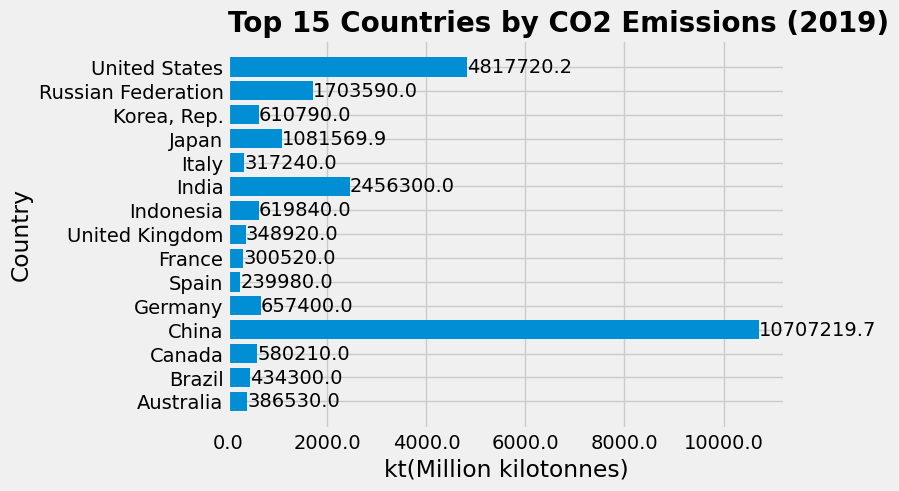

In [165]:
from matplotlib.ticker import FuncFormatter

fig, ax = plt.subplots()
ax.barh(Top_15_CO2_countries, Top_15_CO2_values)
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x * 1e-3:0.1f}')) # Formats the x-axis values
ax.bar_label(ax.containers[0], label_type='edge', fmt='%.1f') # Sets values in front of Bars
plt.title('Top 15 Countries by CO2 Emissions (2019)',fontsize=20, fontweight='bold', loc="left")
plt.xlabel("kt(Million kilotonnes)", loc='center')
plt.ylabel("Country")

In [167]:
# Exporting the CO2 Emissions dataset to use later on in the Correlation phase
df_c.to_csv("CO2_emissions.csv")

## **Dataset by Years**

In [157]:
df_t.sample(5)

,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
2007.0,NaN,486179.996997,1769.999981,142610.002428,16969.999313,4139.999866,540.000021,1303116.441286,131830.001831,162809.997559,...,NaN,105139.99939,109.999999,29368779.202002,200.000003,NaN,23270.000458,397059.997559,1980.000019,9760.000229
2009.0,NaN,501940.011457,4880.000114,146719.997555,21149.999619,4219.99979,519.999981,1455346.868256,157020.004272,156570.007324,...,NaN,132289.993286,129.999995,29267375.18512,180.000007,NaN,26569.999695,404200.012207,2490.00001,7750.0
2013.0,NaN,565430.012964,5989.999771,193299.997561,26959.999084,4440.000057,479.999989,1713791.55699,184470.001221,183250.0,...,NaN,164300.003052,109.999999,33119382.990346,200.000003,NaN,27829.999924,436920.013428,4239.999771,12279.999733
2001.0,NaN,393150.0,730.0,149460.0,15960.0,3230.0,520.0,991061.713693,97200.0,125260.0,...,NaN,56720.0,90.0,23845771.44518,160.0,NaN,16070.0,320540.0,1840.0,13900.0
2008.0,NaN,519309.990123,3559.999943,151339.99972,19280.000687,4079.999924,540.000021,1408053.350443,156050.003052,167229.995728,...,NaN,117589.996338,100.000001,29595752.397156,170.000002,NaN,24219.999313,426739.990234,2190.000057,7599.999905


Text(0, 0.5, 'kt(Million kilotonnes)')

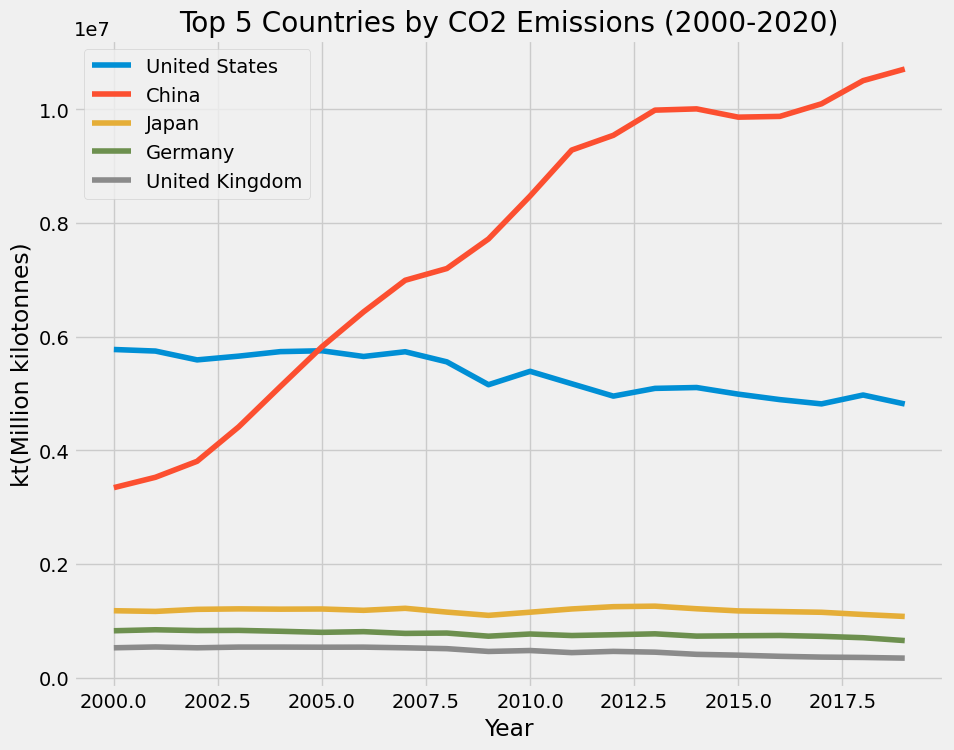

In [160]:
top_5_countries = ["United States","China","Japan","Germany","United Kingdom"]
years = df_t.index

fig, ax = plt.subplots(figsize=(10, 8))
for country in top_5_countries:
    ax.plot(years, df_t.loc[:][country], label = country)
    
plt.legend()
plt.title('Top 5 Countries by CO2 Emissions (2000-2020)')
plt.xlabel("Year")
plt.ylabel("kt(Million kilotonnes)")